# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I arrived at the airport ab...
1,"✅ Trip Verified | Filthy plane, cabin staff o..."
2,✅ Trip Verified | Chaos at Terminal 5 with B...
3,Not Verified | BA cancelled our flight and co...
4,✅ Trip Verified | When on our way to Heathrow ...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,✅ Trip Verified | I arrived at the airport ab...
1,"✅ Trip Verified | Filthy plane, cabin staff o..."
2,✅ Trip Verified | Chaos at Terminal 5 with B...
3,Not Verified | BA cancelled our flight and co...
4,✅ Trip Verified | When on our way to Heathrow ...
...,...
995,✅ Trip Verified | While it is still fresh in ...
996,✅ Trip Verified | London to Philadelphia. I u...
997,✅ Trip Verified | Madrid to London. Good impro...
998,✅ Trip Verified | London to Munich. The groun...


In [ ]:
df['reviews']= df['reviews'].str.extract(r'\|(.*)', expand=False)

In [ ]:
df

,reviews
0,I arrived at the airport about 2.5 hours bef...
1,"Filthy plane, cabin staff ok, appalling cust..."
2,Chaos at Terminal 5 with BA cancellations a...
3,BA cancelled our flight and could not book u...
4,When on our way to Heathrow Airport and merel...
...,...
995,"While it is still fresh in my mind, I’d like..."
996,London to Philadelphia. I upgraded from coac...
997,Madrid to London. Good improvement. This BA c...
998,London to Munich. The ground staff were very...


# Cleaning the data

In [ ]:
import re

 #Creating function to clean the text
def clean_data(text):
  #Remove all special characters and numbers except alphabets
  text=re.sub('[^A-Za-z]+',' ',str(text))
  return text


In [ ]:
df['Cleaned Reviews']= df['reviews'].apply(clean_data)
df.head()

,reviews,Cleaned Reviews
0,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...
1,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...
2,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...
3,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...
4,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...


**We use punkt tokenizer for tokenization**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def token_stop_pos(text):
    doc = nlp(text)
    newlist = []
    for token in doc:
        if token.lemma_.lower() not in STOP_WORDS and not token.is_punct:
            newlist.append(tuple([token.lemma_, token.pos_]))
    return newlist

df['pos_tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,pos_tagged
0,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[( , SPACE), (arrive, VERB), (airport, NOUN), ..."
1,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[( , SPACE), (filthy, ADJ), (plane, NOUN), (ca..."
2,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[( , SPACE), (Chaos, PROPN), (Terminal, PROPN)..."
3,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[( , SPACE), (BA, PROPN), (cancel, VERB), (fli..."
4,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[( , SPACE), (way, NOUN), (Heathrow, PROPN), (..."


In [ ]:
#Lemmatization:- For obtaining the stem words
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
  lemma_rew = ""
  for word, pos in pos_data:
      if pos.startswith('J'):
          lemma = wordnet_lemmatizer.lemmatize(word, pos=wordnet.ADJ)
      elif pos.startswith('V'):
          lemma = wordnet_lemmatizer.lemmatize(word, pos=wordnet.VERB)
      elif pos.startswith('N'):
          lemma = wordnet_lemmatizer.lemmatize(word, pos=wordnet.NOUN)
      elif pos.startswith('R'):
          lemma = wordnet_lemmatizer.lemmatize(word, pos=wordnet.ADV)
      else:
          lemma = wordnet_lemmatizer.lemmatize(word)
      lemma_rew = lemma_rew + " " + lemma
  return lemma_rew.strip()

df['Lemma'] = df['pos_tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,pos_tagged,Lemma
0,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[( , SPACE), (arrive, VERB), (airport, NOUN), ...",arrive airport hour takeoff time check securit...
1,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[( , SPACE), (filthy, ADJ), (plane, NOUN), (ca...",filthy plane cabin staff ok appalling customer...
2,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[( , SPACE), (Chaos, PROPN), (Terminal, PROPN)...",Chaos Terminal BA cancellation delay staff dif...
3,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[( , SPACE), (BA, PROPN), (cancel, VERB), (fli...",BA cancel flight book flight day spend k expen...
4,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[( , SPACE), (way, NOUN), (Heathrow, PROPN), (...",way Heathrow Airport merely half hour schedule...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I arrived at the airport about 2.5 hours bef...,arrive airport hour takeoff time check securit...
1,"Filthy plane, cabin staff ok, appalling cust...",filthy plane cabin staff ok appalling customer...
2,Chaos at Terminal 5 with BA cancellations a...,Chaos Terminal BA cancellation delay staff dif...
3,BA cancelled our flight and could not book u...,BA cancel flight book flight day spend k expen...
4,When on our way to Heathrow Airport and merel...,way Heathrow Airport merely half hour schedule...
...,...,...
995,"While it is still fresh in my mind, I’d like...",fresh mind d like commend hard work crew BA fl...
996,London to Philadelphia. I upgraded from coac...,London Philadelphia upgrade coach business wan...
997,Madrid to London. Good improvement. This BA c...,Madrid London good improvement BA club Europe ...
998,London to Munich. The ground staff were very...,London Munich ground staff friendly plane clea...


# VADER Sentiment Analysis
VADER(Valence Aware Dictionary and Sentiment Reasoner)

VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyze = SentimentIntensityAnalyzer()

#Function to calculate VADER sentiment
vader_analysis = lambda review: analyze.polarity_scores(review)['compound']

#Apply VADER sentiment analysis to the Lemma column
df['Sentiment']=df['Lemma'].apply(vader_analysis)

#Function to analyze sentiment
vader_sentiment_analysis = lambda compound: 'Positive' if compound >=0.5 else 'Negative' if compound < 0 else 'Neutral'

#Apply Sentiment Analysis to the Sentiment column
df['Analysis'] = df['Sentiment'].apply(vader_sentiment_analysis)
df.head()

,reviews,Cleaned Reviews,pos_tagged,Lemma,Sentiment,Analysis
0,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[( , SPACE), (arrive, VERB), (airport, NOUN), ...",arrive airport hour takeoff time check securit...,0.5106,Positive
1,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[( , SPACE), (filthy, ADJ), (plane, NOUN), (ca...",filthy plane cabin staff ok appalling customer...,-0.6369,Negative
2,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[( , SPACE), (Chaos, PROPN), (Terminal, PROPN)...",Chaos Terminal BA cancellation delay staff dif...,-0.9300,Negative
3,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[( , SPACE), (BA, PROPN), (cancel, VERB), (fli...",BA cancel flight book flight day spend k expen...,-0.7178,Negative
4,When on our way to Heathrow Airport and merel...,When on our way to Heathrow Airport and merel...,"[( , SPACE), (way, NOUN), (Heathrow, PROPN), (...",way Heathrow Airport merely half hour schedule...,-0.9246,Negative


# Visual Representation of Sentiment Analysis

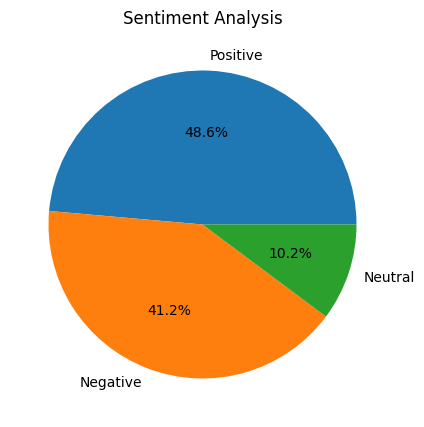

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment_count = df['Analysis'].value_counts()

#Create Pie chart
plt.figure(figsize=(5,5))
plt.pie(sentiment_count.values, labels=sentiment_count.index, autopct='%1.1f%%')
plt.title("Sentiment Analysis")
plt.show()


**Based on the Pie Chart of the sentiment Distribution:**

1.   Positive: Most reviews have positive feedback, with 48.8%. This indicates that a significant portion of the thoughts expressed satisfaction with experiences.

2.   Negative:  A significant percentage of the reviews express dissatisfaction with the experience. Approximately 40.4% of the reviews conveyed a negative sentiment

3.   Neutral: Around 10.8% had neutral sentiments. There was no clear trend toward positive or negative sentiment in these reviews.


## **Wordcloud**

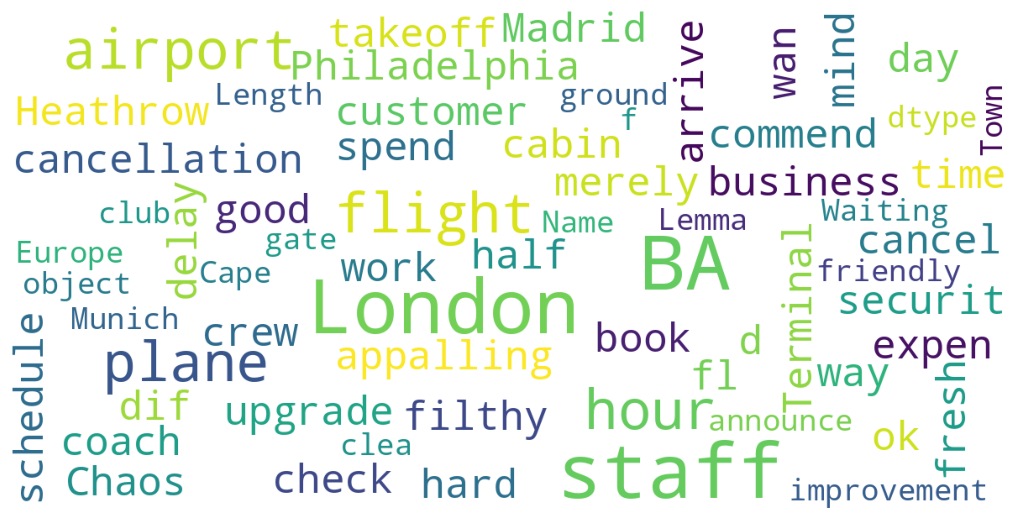

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def print_wordcloud(data):
  wordcloud = WordCloud(
      background_color= 'white',
      stopwords=stopwords,
      max_words=100,
      max_font_size=30,
      scale=3,
      random_state=1
  )

  wordcloud=wordcloud.generate(str(data))

  fig = plt.figure(1, figsize=(13,13))
  plt.axis('off')

  plt.imshow(wordcloud)
  plt.show()

print_wordcloud(df.Lemma)
